In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from LinearRegression import LinearRegression

import matplotlib as mpl

In [2]:
mpl.rcParams['agg.path.chunksize'] = 10000

In [67]:
data = pd.read_csv(r'res_data_log.csv').iloc[:400000,:]

In [68]:
def Z_Score(data):    
    mean = np.mean(data)    # 均值
    std_dev = np.std(data)    # 标准差
    norm_data = (data - mean) / std_dev    
    return norm_data

In [69]:
features = ['prey','predator']

for feature in features:
    data[feature] = Z_Score(data[feature])

In [70]:
#data split
train_data = data.sample(frac = 0.8)
test_data = data.drop(train_data.index)

In [71]:
#feature
input_param_name = 'time'
output_param_name1 = 'prey'
output_param_name2 = 'predator'

In [72]:
x_train = train_data[[input_param_name]].values
prey_train = train_data[[output_param_name1]].values
predator_train = train_data[[output_param_name2]].values

In [73]:
x_test = test_data[input_param_name].values
prey_test = test_data[output_param_name1].values
predator_test = test_data[output_param_name2].values

In [74]:
#model paramter
num_iterations = 500
learning_rate = 0.01
#
linear_regression1 = LinearRegression(x_train,prey_train)
theta1, cost_history1=linear_regression.train(learning_rate,num_iterations)

linear_regression2 = LinearRegression(x_train,predator_train)
theta2, cost_history2=linear_regression.train(learning_rate,num_iterations)

In [75]:
linear_regression1

the loss before trianing： 28.973531723820457
the loss after training: 26.90371599732968


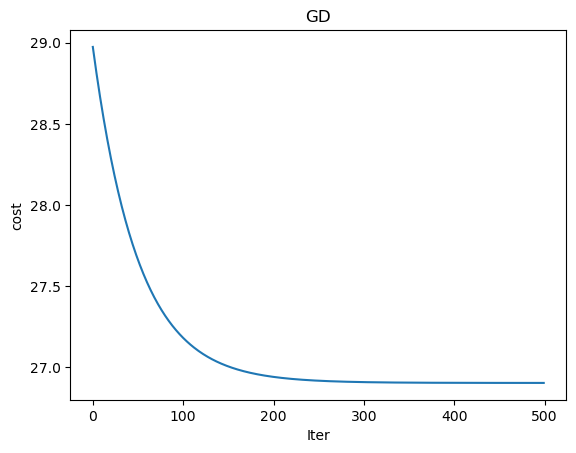

In [76]:
print('the loss before trianing：',cost_history[0])
print('the loss after training:',cost_history[-1])

plt.plot(range(num_iterations),cost_history)
plt.xlabel('Iter')
plt.ylabel('cost')
plt.title('GD')
plt.show()

In [77]:
predictions_num = len(x_train)

x_predictions = np.linspace(x_train.min(),x_train.max(),predictions_num).reshape(predictions_num,1)
y_prey_pre = linear_regression1.predict(x_predictions)

In [79]:
#MSE
predictions_num = len(x_test)
x_test_pre = np.linspace(x_test.min(),x_test.max(),predictions_num).reshape(predictions_num,1)
prey_pre1 = linear_regression1.predict(x_test_pre)
LR_MSE1 = mean_squared_error(prey_pre1,prey_test)
print('the MSE IS:',LR_MSE1)

predictions_num = len(x_test)
prey_pre2 = linear_regression2.predict(x_test_pre)
LR_MSE2 = mean_squared_error(prey_pre1,predator_test)
print('the MSE IS:',LR_MSE2)

the MSE IS: 0.9890733671043154
the MSE IS: 1.0129698115894812


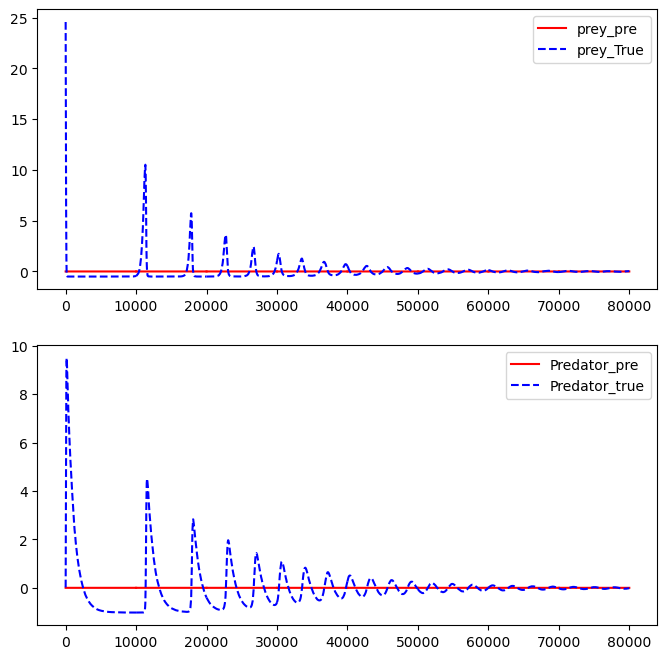

In [84]:
#the ture values and the preditions
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt1, = plt.plot(prey_pre1, 'r', label="prey_pre", linestyle='-')
plt2, = plt.plot(prey_test, "b", label="prey_True", linestyle='--')
plt.legend(handles=[plt1, plt2], loc='upper right')


plt.subplot(212)
plt1, = plt.plot(prey_pre2, 'r', label="Predator_pre", linestyle='-')
plt2, = plt.plot(predator_test, "b", label="Predator_true", linestyle='--')
plt.legend(handles=[plt1, plt2], loc='upper right')

In [98]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

regr_1= DecisionTreeRegressor(max_depth=5)
regr_2 =  DecisionTreeRegressor(max_depth=5)

#train splitly
regr_1.fit(x_train,prey_train)
regr_2.fit(x_train,predator_train)


DecisionTreeRegressor(max_depth=5)

In [99]:
#MSE
prey_pre = regr_1.predict(x_test.reshape(-1,1))
LR_MSE1 = mean_squared_error(prey_pre,prey_test)
print('the MSE IS:',LR_MSE1)

predator_pre = regr_2.predict(x_test.reshape(-1,1))
LR_MSE2 = mean_squared_error(predator_pre,predator_test)
print('the MSE IS:',LR_MSE2)

the MSE IS: 0.23700779409455464
the MSE IS: 0.1359193959076526


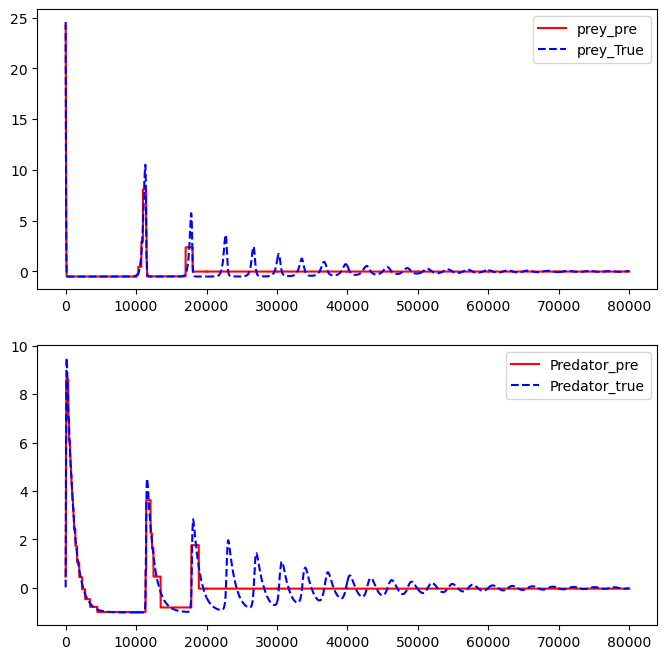

In [100]:
#the ture values and the preditions
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt1, = plt.plot(prey_pre, 'r', label="prey_pre", linestyle='-')
plt2, = plt.plot(prey_test, "b", label="prey_True", linestyle='--')
plt.legend(handles=[plt1, plt2], loc='upper right')


plt.subplot(212)
plt1, = plt.plot(predator_pre, 'r', label="Predator_pre", linestyle='-')
plt2, = plt.plot(predator_test, "b", label="Predator_true", linestyle='--')
plt.legend(handles=[plt1, plt2], loc='upper right')